In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
max_scores = {
    "Cell Cycle Transcription by Coupled CDK and Network Oscillators": 90,
    "Metabolic Interactions in the Gut Microbiome": 120,
    "Mammalian Cell Cycle 2006": 100,
    "T-LGL Survival Network 2011 Reduced Network": 180,
    "IL-1 Signaling": 1180,
    "Glucose Repression Signaling 2009": 730,
    "Signaling in Macrophage Activation": 3200,
    "Influenza A Virus Replication Cycle": 1310,
    "ABA_GA_base_A": 505,
    "ABA_scrambled": 505,
    }

In [3]:
df_raw = pd.read_csv("probability_log.csv")
df_raw["max"] = df_raw["sample_model"].apply(lambda x: max_scores[x])

df_raw.head()

,sample_model,seed,iter,pop,keep,mix,prob,0,1,2,...,92,93,94,95,96,97,98,99,100,max
0,Cell Cycle Transcription by Coupled CDK and Ne...,1,20,5,2,0,0.01,0.000,NaN,NaN,...,NaN,NaN,NaN,74.25,NaN,NaN,NaN,NaN,77.00,90
1,Cell Cycle Transcription by Coupled CDK and Ne...,2,20,5,2,0,0.01,0.000,NaN,NaN,...,NaN,NaN,NaN,80.00,NaN,NaN,NaN,NaN,83.00,90
2,Cell Cycle Transcription by Coupled CDK and Ne...,3,20,5,2,0,0.01,64.500,NaN,NaN,...,NaN,NaN,NaN,78.00,NaN,NaN,NaN,NaN,78.00,90
3,Cell Cycle Transcription by Coupled CDK and Ne...,4,20,5,2,0,0.01,20.000,NaN,NaN,...,NaN,NaN,NaN,27.25,NaN,NaN,NaN,NaN,27.25,90
4,Cell Cycle Transcription by Coupled CDK and Ne...,5,20,5,2,0,0.01,25.125,NaN,NaN,...,NaN,NaN,NaN,73.00,NaN,NaN,NaN,NaN,73.00,90


In [ ]:
df_per = df_raw.groupby(["sample_model", "prob"]).mean().reset_index()
df_per.iloc[:,7:] = df_per.iloc[:,7:].div(df_per["max"], axis=0)

df_per.head()

,sample_model,prob,seed,iter,pop,keep,mix,0,1,2,...,92,93,94,95,96,97,98,99,100,max
0,ABA_GA_base_A,0.005,25.5,20.0,5.0,2.0,0.0,0.617254,NaN,NaN,...,NaN,NaN,NaN,0.671914,NaN,NaN,NaN,NaN,0.673049,1.0
1,ABA_GA_base_A,0.01,25.5,20.0,5.0,2.0,0.0,0.617254,NaN,NaN,...,NaN,NaN,NaN,0.677704,NaN,NaN,NaN,NaN,0.678432,1.0
2,ABA_GA_base_A,0.05,25.5,20.0,5.0,2.0,0.0,0.617254,NaN,NaN,...,NaN,NaN,NaN,0.656886,NaN,NaN,NaN,NaN,0.659519,1.0
3,ABA_GA_base_A,0.1,25.5,20.0,5.0,2.0,0.0,0.617254,NaN,NaN,...,NaN,NaN,NaN,0.641775,NaN,NaN,NaN,NaN,0.644100,1.0
4,ABA_GA_base_A,0.2,25.5,20.0,5.0,2.0,0.0,0.617254,NaN,NaN,...,NaN,NaN,NaN,0.620964,NaN,NaN,NaN,NaN,0.620964,1.0


In [5]:
sample_models = ["Cell Cycle Transcription by Coupled CDK and Network Oscillators",
                 "Metabolic Interactions in the Gut Microbiome",
                 "Mammalian Cell Cycle 2006",
                 "T-LGL Survival Network 2011 Reduced Network",
                 "IL-1 Signaling",
                 "Glucose Repression Signaling 2009",
                 "Signaling in Macrophage Activation",
                 "Influenza A Virus Replication Cycle"]

samples = df_per.loc[df_per["sample_model"].isin(sample_models)]
aba = df_per.loc[df_per["sample_model"] == "ABA_GA_base_A"]
aba_scramble = df_per.loc[df_per["sample_model"] == "ABA_scrambled"]

In [6]:
samples_iter = samples.drop(columns="sample_model").groupby("prob").mean().reset_index()
samples_iter.iloc[:,6:107] = samples_iter.iloc[:,6:107].interpolate(axis=1)
samples_iter

,prob,seed,iter,pop,keep,mix,0,1,2,3,...,92,93,94,95,96,97,98,99,100,max
0,0.01,13.0,20.0,5.0,2.0,0.0,0.412975,0.418479,0.423982,0.429485,...,0.704172,0.705420,0.706667,0.707914,0.709982,0.712050,0.714118,0.716187,0.718255,1.0
1,0.05,38.0,20.0,5.0,2.0,0.0,0.412975,0.433600,0.454224,0.474849,...,0.840391,0.841494,0.842596,0.843699,0.844585,0.845472,0.846358,0.847244,0.848130,1.0
2,0.1,63.0,20.0,5.0,2.0,0.0,0.412975,0.436193,0.459411,0.482628,...,0.847975,0.849427,0.850880,0.852332,0.853018,0.853705,0.854391,0.855078,0.855764,1.0
3,0.2,88.0,20.0,5.0,2.0,0.0,0.412975,0.447079,0.481182,0.515285,...,0.843446,0.844136,0.844825,0.845515,0.846003,0.846491,0.846980,0.847468,0.847956,1.0
4,0.5,113.0,20.0,5.0,2.0,0.0,0.412975,0.455216,0.497456,0.539697,...,0.798610,0.798905,0.799200,0.799495,0.800096,0.800698,0.801300,0.801902,0.802504,1.0
5,"{1: 0.5, 4:0.1}",138.0,20.0,5.0,2.0,0.0,0.412975,0.457002,0.501029,0.545055,...,0.864878,0.865499,0.866119,0.866739,0.867327,0.867915,0.868504,0.869092,0.869680,1.0


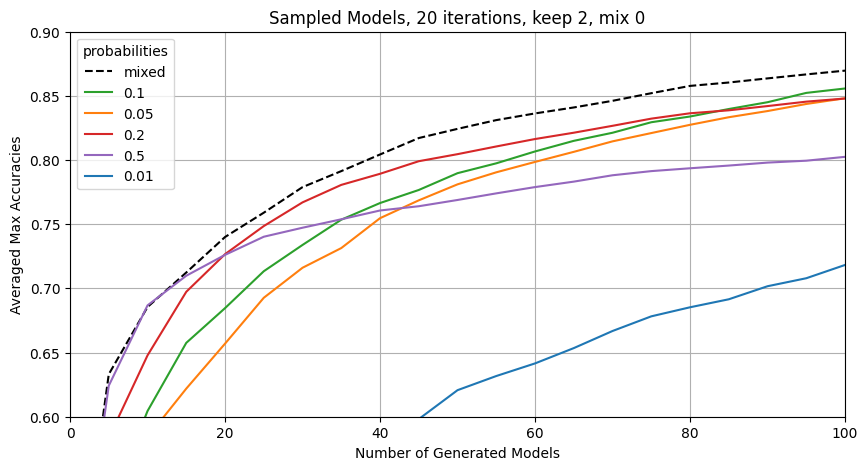

In [7]:
fig, ax1= plt.subplots(1,figsize=(10,5))
# set up
ax1.plot(range(101), samples_iter.iloc[5,6:107], label="mixed", color = "black", linestyle="--")
ax1.plot(range(101), samples_iter.iloc[2,6:107], label="0.1", color = "C2")
ax1.plot(range(101), samples_iter.iloc[1,6:107], label="0.05", color = "C1")
ax1.plot(range(101), samples_iter.iloc[3,6:107], label="0.2", color = "C3")
ax1.plot(range(101), samples_iter.iloc[4,6:107], label="0.5", color = "C4")
ax1.plot(range(101), samples_iter.iloc[0,6:107], label="0.01", color = "C0")

ax1.legend(title="probabilities", loc="upper left")
ax1.grid()
ax1.set_xlim(0, 100)
ax1.set_ylim(0.6, 0.9)
ax1.set_xlabel("Number of Generated Models")
ax1.set_ylabel("Averaged Max Accuracies")
ax1.set_title("Sampled Models, 20 iterations, keep 2, mix 0")

plt.show()

In [8]:
aba_iter = aba.drop(columns="sample_model").groupby("prob").mean().reset_index()
aba_iter.iloc[:,6:107] = aba_iter.iloc[:,6:107].interpolate(axis=1)
aba_iter

,prob,seed,iter,pop,keep,mix,0,1,2,3,...,92,93,94,95,96,97,98,99,100,max
0,0.005,25.5,20.0,5.0,2.0,0.0,0.617254,0.617924,0.618595,0.619266,...,0.670107,0.670709,0.671311,0.671914,0.672141,0.672368,0.672595,0.672822,0.673049,1.0
1,0.01,25.5,20.0,5.0,2.0,0.0,0.617254,0.618171,0.619088,0.620005,...,0.675473,0.676217,0.676960,0.677704,0.677849,0.677995,0.678141,0.678287,0.678432,1.0
2,0.05,25.5,20.0,5.0,2.0,0.0,0.617254,0.618241,0.619229,0.620217,...,0.656588,0.656687,0.656787,0.656886,0.657413,0.657940,0.658466,0.658993,0.659519,1.0
3,0.1,25.5,20.0,5.0,2.0,0.0,0.617254,0.617273,0.617292,0.617311,...,0.641599,0.641658,0.641716,0.641775,0.642240,0.642705,0.643170,0.643635,0.644100,1.0
4,0.2,25.5,20.0,5.0,2.0,0.0,0.617254,0.617254,0.617254,0.617254,...,0.620789,0.620847,0.620906,0.620964,0.620964,0.620964,0.620964,0.620964,0.620964,1.0
5,0.5,25.5,20.0,5.0,2.0,0.0,0.617254,0.617254,0.617254,0.617254,...,0.617254,0.617254,0.617254,0.617254,0.617254,0.617254,0.617254,0.617254,0.617254,1.0


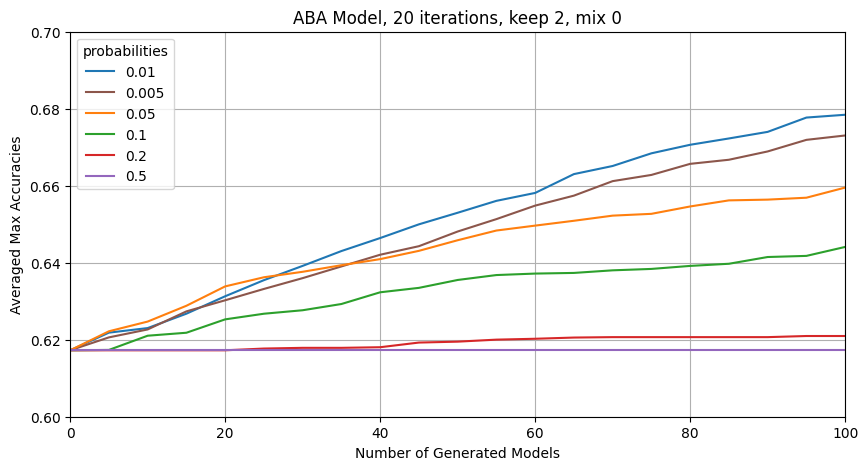

In [9]:
fig, ax1= plt.subplots(1,figsize=(10,5))
# set up
ax1.plot(range(101), aba_iter.iloc[1,6:107], label="0.01", color = "C0")
ax1.plot(range(101), aba_iter.iloc[0,6:107], label="0.005", color = "C5")
ax1.plot(range(101), aba_iter.iloc[2,6:107], label="0.05", color = "C1")
ax1.plot(range(101), aba_iter.iloc[3,6:107], label="0.1", color = "C2")
ax1.plot(range(101), aba_iter.iloc[4,6:107], label="0.2", color = "C3")
ax1.plot(range(101), aba_iter.iloc[5,6:107], label="0.5", color = "C4")

ax1.legend(title="probabilities", loc="upper left")
ax1.grid()
ax1.set_xlim(0, 100)
ax1.set_ylim(0.6, 0.7)
ax1.set_xlabel("Number of Generated Models")
ax1.set_ylabel("Averaged Max Accuracies")
ax1.set_title("ABA Model, 20 iterations, keep 2, mix 0")

plt.show()

In [10]:
aba_scramble_iter = aba_scramble.drop(columns="sample_model").groupby("prob").mean().reset_index()
aba_scramble_iter.iloc[:,6:107] = aba_scramble_iter.iloc[:,6:107].interpolate(axis=1)
aba_scramble_iter

,prob,seed,iter,pop,keep,mix,0,1,2,3,...,92,93,94,95,96,97,98,99,100,max
0,0.005,13.0,20.0,5.0,2.0,0.0,0.312103,0.315883,0.319664,0.323444,...,0.576264,0.578871,0.581478,0.584085,0.586108,0.588131,0.590154,0.592177,0.594200,1.0
1,0.01,13.0,20.0,5.0,2.0,0.0,0.312103,0.318451,0.324799,0.331147,...,0.594939,0.595632,0.596326,0.597020,0.597583,0.598146,0.598709,0.599273,0.599836,1.0
2,0.05,13.0,20.0,5.0,2.0,0.0,0.312103,0.333557,0.355011,0.376465,...,0.625030,0.625952,0.626874,0.627796,0.628820,0.629843,0.630866,0.631889,0.632912,1.0
3,0.1,13.0,20.0,5.0,2.0,0.0,0.312103,0.334143,0.356183,0.378223,...,0.602035,0.602547,0.603060,0.603573,0.604788,0.606003,0.607218,0.608433,0.609648,1.0
4,0.2,13.0,20.0,5.0,2.0,0.0,0.312103,0.339593,0.367084,0.394574,...,0.576568,0.576759,0.576950,0.577141,0.577472,0.577803,0.578134,0.578465,0.578795,1.0
5,0.5,13.0,20.0,5.0,2.0,0.0,0.312103,0.331598,0.351093,0.370589,...,0.517692,0.517712,0.517732,0.517751,0.518268,0.518785,0.519303,0.519820,0.520337,1.0


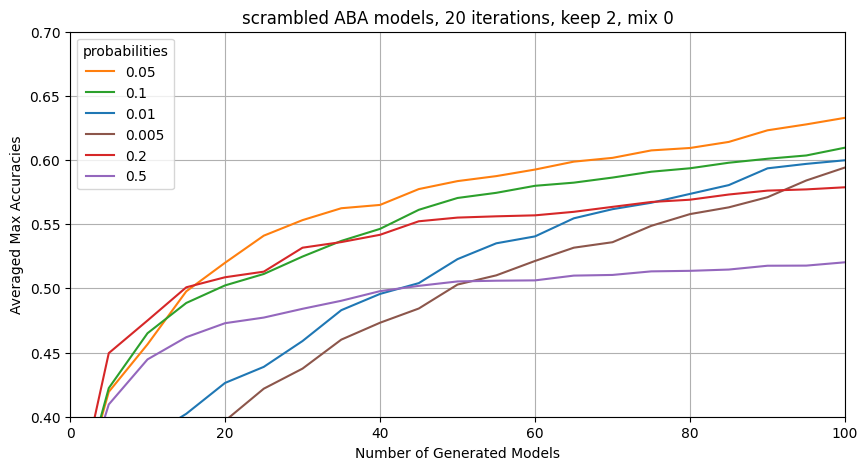

In [11]:
fig, ax1= plt.subplots(1,figsize=(10,5))
# set up
ax1.plot(range(101), aba_scramble_iter.iloc[2,6:107], label="0.05", color = "C1")
ax1.plot(range(101), aba_scramble_iter.iloc[3,6:107], label="0.1", color = "C2")
ax1.plot(range(101), aba_scramble_iter.iloc[1,6:107], label="0.01", color = "C0")
ax1.plot(range(101), aba_scramble_iter.iloc[0,6:107], label="0.005", color = "C5")
ax1.plot(range(101), aba_scramble_iter.iloc[4,6:107], label="0.2", color = "C3")
ax1.plot(range(101), aba_scramble_iter.iloc[5,6:107], label="0.5", color = "C4")

ax1.legend(title="probabilities", loc="upper left")
ax1.grid()
ax1.set_xlim(0, 100)
ax1.set_ylim(0.4, 0.7)
ax1.set_xlabel("Number of Generated Models")
ax1.set_ylabel("Averaged Max Accuracies")
ax1.set_title("scrambled ABA models, 20 iterations, keep 2, mix 0")

plt.show()